In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
#df=pd.read_csv('/Users/cristinaacevedo/Desktop/players.csv') #for pc
df=pd.read_csv('players.csv') #online

In [3]:
#Check data
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [5]:
#Drop columns
df.drop(['Unnamed: 0','ID','Flag','Club Logo','Real Face'],axis=1,inplace=True)


In [6]:
footValues=df['Preferred Foot'].unique()
df['Preferred Foot'].replace(to_replace=[footValues[0],footValues[1]],value=[1,0],inplace=True)


In [7]:
df['Position']='Plays' + df['Position'].astype(str)
positions=df['Position'].unique()
positionDummies=pd.get_dummies(df['Position'])
df.drop(['Position'],axis=1,inplace=True)
df=pd.concat([df, positionDummies], axis=1)
df.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special',
       ...
       'PlaysRCB', 'PlaysRCM', 'PlaysRDM', 'PlaysRF', 'PlaysRM', 'PlaysRS',
       'PlaysRW', 'PlaysRWB', 'PlaysST', 'Playsnan'],
      dtype='object', length=111)

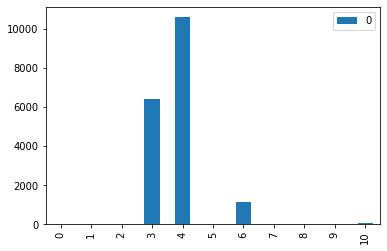

In [8]:
df['Body Type'].unique()
bodyTypesCounts=Counter(df['Body Type'])
bodyTypesCounts = pd.DataFrame.from_dict(bodyTypesCounts, orient='index').reset_index()
bodyTypesCounts.plot(kind='bar') #FIX X AXIS LABELS

In [9]:
realBodyTypes=bodyTypesCounts[bodyTypesCounts[0]>1].reset_index()

df['Body Type']=df['Body Type'].replace(to_replace=[realBodyTypes['index'].iloc[0], realBodyTypes['index'].iloc[1], realBodyTypes['index'].iloc[2]],value=[0,1,2])
df['Body Type']=df['Body Type'].apply(pd.to_numeric, errors='coerce')

In [10]:
df['Work Rate'].unique()
df[['Rate Up','Rate Down']] = df['Work Rate'].str.split("/",expand=True,)


In [11]:
df['Rate Up']=df['Rate Up'].replace(['Low','Medium','High'],[0,1,2])
df['Rate Down']=df['Rate Down'].replace([' Low',' Medium',' High'],[0,1,2])
df.drop(['Work Rate'],axis=1,inplace=True)


In [12]:
df['Loaned']=df['Loaned From'].notnull()
df.drop(['Loaned From'],axis=1,inplace=True)
df['Loaned']=np.multiply(df['Loaned'], 1)
df.drop(['Photo'],axis=1,inplace=True)


In [13]:
df.describe()
df.dtypes

Name            object
Age              int64
Nationality     object
Overall          int64
Potential        int64
                ...   
PlaysST          uint8
Playsnan         uint8
Rate Up        float64
Rate Down      float64
Loaned           int64
Length: 111, dtype: object

In [14]:
nationalityDummies=pd.get_dummies(df['Nationality'])
df.drop(['Nationality'],axis=1,inplace=True)
df=pd.concat([df, nationalityDummies], axis=1)

In [15]:
clubDummies=pd.get_dummies(df['Club'])
df.drop(['Club'],axis=1,inplace=True)
df=pd.concat([df, clubDummies], axis=1)

In [16]:
df['Value']=df['Value'].str[1:-1]
df['Value']=pd.to_numeric(df['Value'])

df['Wage']=df['Wage'].str[1:-1]
df['Wage']=pd.to_numeric(df['Wage'])


In [17]:
df['Weight']=df['Weight'].str.rstrip('lbs').astype(float)

In [18]:
df[['Height feet','Height inch']] = df['Height'].str.split("'",expand=True,)
df['Height feet']=pd.to_numeric(df['Height feet'])
df['Height inch']=pd.to_numeric(df['Height inch'])
df.drop(['Height'],axis=1,inplace=True)


In [19]:
df['Release Clause']=df['Release Clause'].str[1:-1]
df['Release Clause']=pd.to_numeric(df['Release Clause'])

In [20]:
colsNames=df.iloc[:,16:42].columns

for i in colsNames:
    newNames=[i, ('+'+i)]
    df[newNames]=df[i].str.split("+",expand=True,)
    df[newNames[0]]=pd.to_numeric(df[newNames[0]])
    df[newNames[1]]=pd.to_numeric(df[newNames[1]])

In [21]:
df.describe()

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Jersey Number,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,...,Wolfsberger AC,Wolverhampton Wanderers,Wycombe Wanderers,Yeni Malatyaspor,Yeovil Town,Yokohama F. Marinos,Zagłębie Lubin,Zagłębie Sosnowiec,Çaykur Rizespor,Örebro SK,Östersunds FK,Śląsk Wrocław,Height feet,Height inch,+LS,+ST,+RS,+LW,+LF,+CF,+RF,+RW,+LAM,+CAM,+RAM,+LM,+LCM,+CM,+RCM,+RM,+LWB,+LDM,+CDM,+RDM,+RWB,+LB,+LCB,+CB,+RCB,+RB
count,18207.000000,18207.000000,18207.000000,17955.000000,17966.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18152.000000,18147.000000,18159.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,18159.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,25.122206,66.238699,71.307299,268.746605,9.861850,1597.809908,0.231896,1.113222,2.947299,2.361308,0.709288,19.546096,165.979129,57.815470,57.815470,57.815470,59.037650,58.719390,58.719390,58.719390,59.037650,58.983129,58.983129,58.983129,59.734710,58.220878,58.220878,58.220878,59.734710,57.513274,56.825146,56.825146,56.825146,57.513274,56.806786,55.614626,55.614626,55.614626,56.806786,49.734181,...,0.001428,0.001812,0.001373,0.001648,0.001538,0.001648,0.001483,0.001373,0.001648,0.001483,0.001208,0.001373,5.490941,5.469960,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531,2.020531
std,4.669943,6.908930,6.136496,289.870694,22.117274,272.586016,0.422055,0.394031,0.660456,0.756164,0.576041,15.947765,15.593344,9.108442,9.108442,9.108442,9.859751,9.820012,9.820012,9.820012,9.859751,9.748896,9.748896,9.748896,9.231659,8.780694,8.780694,8.780694,9.231659,8.956115,10.068077,10.068077,10.068077,8.956115,9.516241,11.702658,11.702658,11.702658,9.516241,18.364524,...,0.037763,0.042536,0.037031,0.040560,0.039187,0.040560,0.038482,0.037031,0.040560,0.038482,0.034741,0.037031,0.499932,4.130788,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551,0.143551
min,16.000000,46.000000,48.000000,1.000000,1.000000,731.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,110.000000,31.000000,31.000000,31.000000,25.000000,27.000000,27.000000,27.000000,25.000000,27.000000,27.000000,27.000000,27.000000,30.000000,30.000000,30.000000,27.000000,30.000000,28.000000,28.000000,28.000000,30.000000,29.000000,25.000000,25.000000,25.000000,29.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,21.000000,62.000000,67.000000,4.900000,1.000000,1457.000000,0.000000,1.000000,3.000000,2.000000,0.000000

In [22]:
dfBackup=df

Names=df['Name']
df.drop(['Name'],axis=1,inplace=True)

df.drop(['Joined'],axis=1,inplace=True)
df.drop(['Contract Valid Until'],axis=1,inplace=True)

from sklearn import preprocessing

x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

df.columns = dfBackup.columns

df.describe()

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Jersey Number,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,...,Wolfsberger AC,Wolverhampton Wanderers,Wycombe Wanderers,Yeni Malatyaspor,Yeovil Town,Yokohama F. Marinos,Zagłębie Lubin,Zagłębie Sosnowiec,Çaykur Rizespor,Örebro SK,Östersunds FK,Śląsk Wrocław,Height feet,Height inch,+LS,+ST,+RS,+LW,+LF,+CF,+RF,+RW,+LAM,+CAM,+RAM,+LM,+LCM,+CM,+RCM,+RM,+LWB,+LDM,+CDM,+RDM,+RWB,+LB,+LCB,+CB,+RCB,+RB
count,18207.000000,18207.000000,18207.000000,17955.000000,17966.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18152.000000,18147.000000,18159.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,18159.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,0.314559,0.421640,0.495900,0.274894,0.015713,0.536724,0.231896,0.028306,0.486825,0.340327,0.354644,0.189246,0.420896,0.446924,0.446924,0.446924,0.508025,0.480597,0.480597,0.480597,0.508025,0.484593,0.484593,0.484593,0.511480,0.486567,0.486567,0.486567,0.511480,0.500241,0.488562,0.488562,0.488562,0.500241,0.505578,0.493784,0.493784,0.493784,0.505578,0.508343,...,0.001428,0.001812,0.001373,0.001648,0.001538,0.001648,0.001483,0.001373,0.001648,0.001483,0.001208,0.001373,0.490941,0.497269,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844,0.006844
std,0.161033,0.143936,0.130564,0.297609,0.039215,0.168784,0.422055,0.098508,0.165114,0.189041,0.288020,0.162732,0.117243,0.151807,0.151807,0.151807,0.147160,0.148788,0.148788,0.148788,0.147160,0.147711,0.147711,0.147711,0.144245,0.151391,0.151391,0.151391,0.144245,0.162838,0.170645,0.170645,0.170645,0.162838,0.173023,0.188753,0.188753,0.188753,0.173023,0.208688,...,0.037763,0.042536,0.037031,0.040560,0.039187,0.040560,0.038482,0.037031,0.040560,0.038482,0.034741,0.037031,0.499932,0.375526,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850,0.047850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.172414,0.333333,0.404255,0.004004,0.000000,0.449536,0.000000,0.000000,0.500000,0.250000,0.000000,0.071429,0.330827,0.350000,0.350000,0.350000,0.417910,0.393939,0.393939,0.393939,0.417910,

In [23]:
#dfBackup.to_csv('processedPlayers.csv', index=False)

In [24]:
df.fillna(df.mean(), inplace=True)


In [25]:
from sklearn.metrics import pairwise_distances

similarity_matrix=pairwise_distances(df)


In [26]:
similarity_matrix.shape

(18207, 18207)

In [27]:
mapping = pd.Series(df.index,index = Names)
mapping

Name
L. Messi                  0
Cristiano Ronaldo         1
Neymar Jr                 2
De Gea                    3
K. De Bruyne              4
                      ...  
J. Lundstram          18202
N. Christoffersson    18203
B. Worman             18204
D. Walker-Rice        18205
G. Nugent             18206
Length: 18207, dtype: int64

In [28]:
def recommend_players(player_index):

    #player_index = mapping[player_input]
    #get similarity values with other players
    #similarity_score is the list of index and similarity matrix

    similarity_score = list(enumerate(similarity_matrix[player_index]))
    #sort in descending order the similarity score of player inputted with all the other players

    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar players. Ignore the first movie.

    similarity_score = similarity_score[1:16]
    #return movie names using the mapping series

    player_indices = [i[0] for i in similarity_score]
    return (Names.iloc[player_indices])


    

In [29]:
recommend_players(0)

14907       L. Polvani
10964          M. Rahn
14387       A. Bennett
17441     P. Kalambayi
18095        S. Dawood
16565      K. Kitamoto
18201         D. Walsh
17855        A. Ekblad
16713        K. Politz
17356       J. Pereira
17130        K. Davies
11923           S. Mai
16027         A. Penny
11306    A. Camigliano
17901          J. Dunn
Name: Name, dtype: object

In [30]:
recommendations = pd.DataFrame(columns=['name','r1','r2','r3','r4','r5','r6','r7','r8','r9','r10','r11','r12','r13','r14','r15'])
recommendations['name']=Names


In [31]:
for i in range(len(Names)):
  myRecommendation=recommend_players(i).reset_index()
  for j in range(1,len(recommendations.columns)):
    recommendations.iloc[i,j]=myRecommendation['Name'][j-1]

In [32]:
recommendations.head(10)

,name,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15
0,L. Messi,L. Polvani,M. Rahn,A. Bennett,P. Kalambayi,S. Dawood,K. Kitamoto,D. Walsh,A. Ekblad,K. Politz,J. Pereira,K. Davies,S. Mai,A. Penny,A. Camigliano,J. Dunn
1,Cristiano Ronaldo,K. Kitamoto,H. Norris,D. Walsh,L. Polvani,T. Brownsword,T. Queen,J. Manley,G. Tegue,Z. Al Haniti,Y. Fujita,A. Bennett,P. Azizi,E. Capradossi,G. Smith,A. Rodriguez
2,Neymar Jr,L. Polvani,D. Walsh,A. Bennett,M. Rahn,G. Tegue,K. Kitamoto,K. Politz,Zhang Enge,P. Kalambayi,A. Camigliano,J. Mauersberger,J. Foulston,S. Dawood,A. Ekblad,J. Pereira
3,De Gea,Z. Ibrahimović,Marcelo,R. Nainggolan,K. De Bruyne,L. Modrić,A. Vidal,Alex Telles,D. Alaba,Alex Sandro,A. Griezmann,P. Dybala,J. Rodríguez,B. Matuidi,D. Srna,Coutinho
4,K. De Bruyne,D. Walsh,G. Tegue,Zhang Enge,L. Polvani,S. Dawood,P. Kalambayi,A. Bennett,A. Ekblad,J. Foulston,J. Dunn,K. Kitamoto,L. Baines,J. Pereira,T. Hama,Y. Kurihara
5,E. Hazard,D. Walsh,L. Polvani,A. Bennett,G. Tegue,M. Rahn,K. Kitamoto,Zhang Enge,K. Politz,P. Kalambayi,J. Foulston,A. Camigliano,S. Dawood,J. Mauersberger,A. Ekblad,K. Davies
6,L. Modrić,D. Walsh,G. Tegue,Zhang Enge,S. Dawood,L. Polvani,A. Bennett,N. Christoffersson,K. Kitamoto,P. Kalambayi,A. Ekblad,L. Baines,Zhu Jiayi,J. Pereira,M. Rahn,H. Norris
7,L. Suárez,K. Kitamoto,H. Norris,D. Walsh,T. Brownsword,T. Queen,J. Manley,G. Smith,P. Azizi,Z. Al Haniti,L. Polvani,A. Ousou,G. Tegue,A. Rodriguez,Y. Fujita,K. Sibille
8,Sergio Ramos,K. Hawley,R. Roache,J. McCombe,M. Roberts,R. Descamps,H. Norris,D. Walsh,M. Bloomfield,J. Imbrechts,N. Christoffersson,T. Brownsword,B. Worman,J. Morris,A. Georgiou,F. Faist
9,J. Oblak,Z. Ibrahimović,Marcelo,L. Modrić,K. De Bruyne,Alex Telles,D. Alaba,R. Nainggolan,A. Vidal,J. Rodríguez,Neymar Jr,P. Dybala,G. Bale,P. Pogba,Cristiano Ronaldo,L. Messi


In [33]:
recommendations.to_csv('recommendations.csv', index=False)